In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

(150, 4)


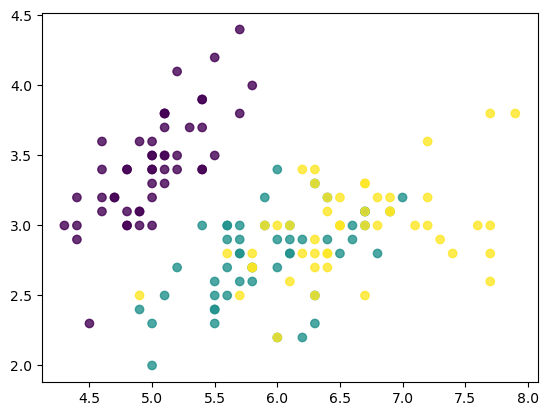

In [11]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0],X[:, 1], c=y, alpha =0.8)

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

print('Train set', X_train.shape)
print('Test set', X_test.shape)

Train set (120, 4)
Test set (30, 4)


In [44]:
X_train

array([[6.1, 2.9, 4.7, 1.4],
       [5.1, 2.5, 3. , 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [4.4, 2.9, 1.4, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5.9, 3. , 5.1, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 4.1, 1.5, 0.1],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.8, 2.8, 4.8, 1.4],
       [5.8, 4. , 1.2, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [4.4, 3. , 1.3, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.7, 3. , 6.1, 2.3],
       [6.9, 3.1, 4.9, 1.5],
       [6. , 2

Text(0.5, 1.0, 'Test set')

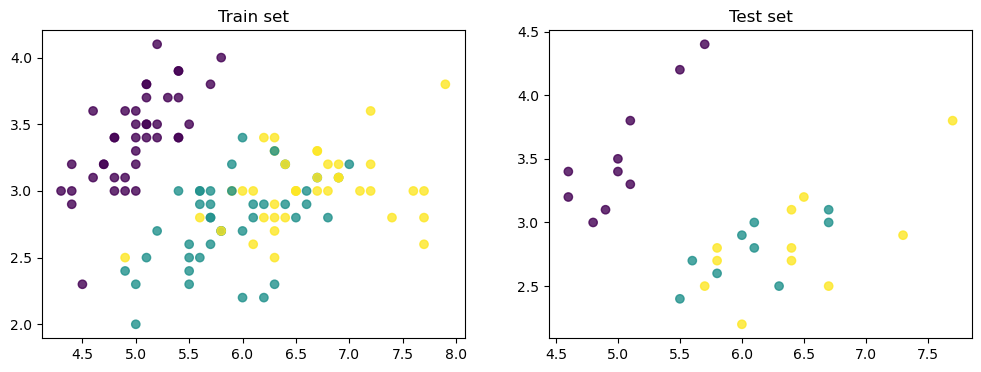

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 1.0
test score: 0.9333333333333333


# 2) Validation Set et Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

In [29]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ])

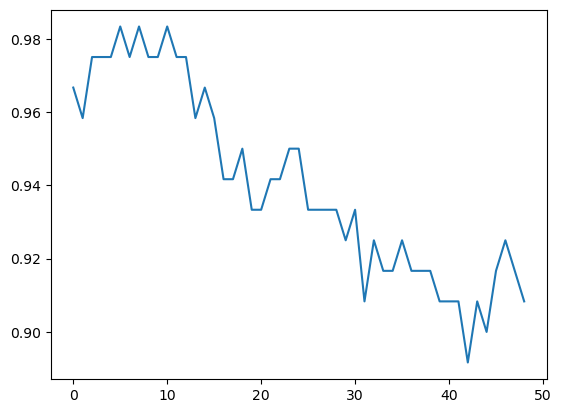

In [31]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# 3. Validation Curve

In [34]:
from sklearn.model_selection import validation_curve

In [42]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

TypeError: too many positional arguments